In [21]:
import numpy as np
import random
from random import randrange
from matplotlib import pyplot as plt

## Monty Hall Problem and Monte Carlo Simulation
### Let's play some Monty Hall problem with a host!

#### Step 1: Construct three 'imaginary' doors, one with a car behind. We don't see which one!

In [43]:
random.seed(23) # Set the random number generator 
doors = [0,1,2]
winning_door = randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
picked_door = 1 # user input, we pick door #1
print("You picked door", str(picked_door) + ".")
doors.remove(picked_door)
print("The remaining doors are therefore:", doors)

You picked door 1.
The remaining doors are therefore: [0, 2]


In [44]:
def reveal_empty_door(doors, winning_door):
    """ 
    The host knows which door is winning, so opens one of the empty doors!
    """
    if len(doors) != 2:
        print("There is an issue!")
        return None
    else:
        return random.choice([doors[i] for i in range(0, len(doors)) if doors[i] != winning_door])

In [45]:
open_door = reveal_empty_door(doors, winning_door)
print("The host reveals door", open_door)
doors.remove(open_door)
remaining_door = doors[0]

The host reveals door 0


In [46]:
print("You initially picked door", picked_door, "but you can switch to door", remaining_door)

You initially picked door 1 but you can switch to door 2


In [47]:
yes_no = input("Type 'yes' if you would like to change your door.")
if yes_no == "yes":
    print("You switched to door", remaining_door)
    picked_door = remaining_door
else:
    print("You keep your door", picked_door)

Type 'yes' if you would like to change your door.no
You keep your door 1


In [48]:
print("Let's see if we won: (True means you are the winner!)")
print(picked_door == winning_door)

Let's see if we won: (True means you are the winner!)
True


#### Step 2: Now let's write a function which returns $1$ if we win, otherwise $0$.

In [49]:
def simulate_round(picked_door, yes_no):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    if yes_no == "yes":
        picked_door = remaining_door
    return int(picked_door == winning_door)

#### Step 3: Let us simulate our decisions!

In [50]:
picked_door = 1 #fix a door (0,1, or 2)
yes_no = "no" #let's start with the strategy of keeping our door!
simulate = 30000 #number of times to simulate
results = np.zeros(simulate) #a lot of zeros
for i in range(simulate):
    results[i] = simulate_round(picked_door, yes_no)
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1)) #running ratios. ratios[10] would give us the percentage of times we won by round 10

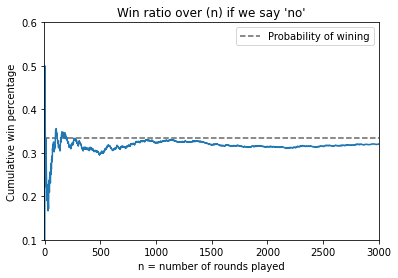

In [51]:
plot_limit = 3000 #plot how the ratio changes oby increasing $n$
x = np.arange(1, plot_limit + 1) 
y = ratios[:plot_limit]
plt.title(r"Win ratio over (n) if we say 'no'") 
plt.xlabel("n = number of rounds played") 
plt.ylabel(r"Cumulative win percentage") 
plt.axhline(y = 1/3, color = 'k', linestyle='--', alpha = 0.6, label = r"Probability of wining")
plt.plot(x,y) 
plt.xlim(-5,plot_limit)
plt.ylim(0.1,0.6)
plt.legend()
plt.show()

In [52]:
picked_door = 1 #fix a door (0,1, or 2)
yes_no = "yes" #let's start with the strategy of not keeping our door!
simulate = 30000 #number of times to simulate
results = np.zeros(simulate) #a lot of zeros
for i in range(simulate):
    results[i] = simulate_round(picked_door, yes_no)
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1)) #running ratios. ratios[10] would give us the percentage of times we won by round 10

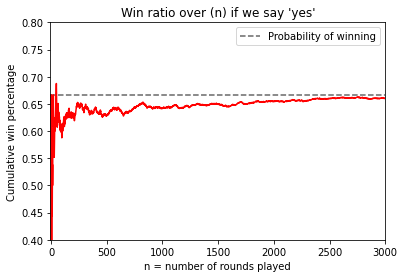

In [53]:
plot_limit = 3000 #plot how the ratio changes oby increasing $n$
x = np.arange(1, plot_limit + 1) 
y = ratios[:plot_limit]
plt.title(r"Win ratio over (n) if we say 'yes'") 
plt.xlabel("n = number of rounds played") 
plt.ylabel(r"Cumulative win percentage") 
plt.axhline(y = 2/3, color = 'k', linestyle='--', alpha = 0.6, label = r"Probability of winning")
plt.plot(x,y, color='r') 
plt.xlim(-5,plot_limit)
plt.ylim(0.4,0.8)
plt.legend()
plt.show()

### Modification of the Game
#### Every time the host asks if we want to keep our door, let's throw a loaded coin where probability of "H" is $\theta$. If "H" shows up, then we say "yes"; otherwise we say "no" and keep our door.

Question: Derive the probability of winning with this strategy as a function of $\theta$. 

Answer: Let us simulate for, e.g., $\theta = 0.6$.

In [19]:
def simulate_with_coins(picked_door, theta):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    flip = np.random.uniform(0,1) 
    if flip <= theta:
        picked_door = remaining_door
    return int(picked_door == winning_door)

In [56]:
picked_door = 1 #fix a door (0,1, or 2)
theta = 0.6
simulate = 30000 #number of times to simulate
results = np.zeros(simulate) #a lot of zeros
for i in range(simulate):
    results[i] = simulate_with_coins(picked_door, theta)
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1))
print("We win with a", ratios[-1], "fraction of the time!")

We win with a 0.5335666666666666 fraction of the time!


This is not surprising! We previously observed that $\mathbb{P}[\text{Win} | \text{"yes"}] = 2/3$ and $\mathbb{P}[\text{Win} | \text{"no"}] = 1/3$. Hence, in this new strategy, by the law of total probability, we can derive:
\begin{align}
\mathbb{P}[\text{Win} | \text{"yes" if "H"}] &=  \mathbb{P}[\text{Win} | \text{"yes"}] \times \theta +  \mathbb{P}[\text{Win} | \text{"no"}] \times (1- \theta) \\
& = 2/3 \times 0.6 + 1/3 \times 0.4 \\
& = 0.534.
\end{align}

### Optional exercise questions
1. In the above paragraph, why did we say "this is not surprising"? What is the relationship between the ratio of rounds that we win versus the probability of winning a single game?
2. The codes in this notebook are not optimized, and there are several inefficiencies. This is due to teaching purposes, as it is clearer to read what happens in a single iteration by going in a for-loop. After you understand the notebook well, please improve the efficiencies and share your attempts with us/students.
3. We always fix picking the door \#1 in the beginning. Simulate the case where we also randomly pick a door in the beginning of each round. Does it make any difference?
4. You play a variant of this game where you pay £1 to play a round. If the door you pick wins, then you make a profit of £1. Otherwise, you lose your £1. You have £5, and you play with the above mentioned strategy of saying "yes" (i.e., switch the door) if a loaded coin comes as "H". If $\theta = 0.4$, what is the probability that you will survive at least until the $10$-th round? Simulate and then mathematically derive this probability.